# Exam Data Mining

### Prof. Acuña
###  Francisco Diaz
### Problem # 3

In [1]:
from __future__ import division
from statistics import mode
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
import numpy as np
import pandas as pd
import os
from PIL import Image
import graphviz
from sklearn.externals.six import StringIO
import pydotplus

path = os.getcwd()
datasetpath = os.path.join(path,"data")
datasetpath1 = os.path.join(datasetpath,"prob3_1.csv")
datasetexpanded = os.path.join(datasetpath,"prob3_expanded.csv")
prob3df = pd.read_csv(datasetpath1)
prob3df_expanded=pd.read_csv(datasetexpanded)
d =prob3df.drop(["+","-"],axis=1).values

In [2]:
#Original table
prob3df

,x,y,+,-
0,0,0,0,100
1,1,0,0,0
2,2,0,0,100
3,0,1,10,100
4,1,1,10,0
5,2,1,10,100
6,0,2,0,100
7,1,2,0,0
8,2,2,0,100


In [3]:
# Table Expanded
prob3df_expanded

,X,Y,class
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


### Plotting the Decision Tree

In [4]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(prob3df_expanded,test_size=0.25)

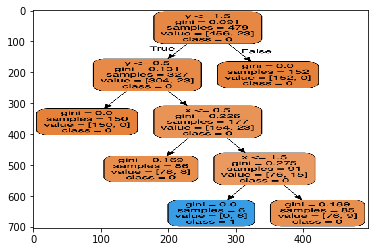

In [5]:
X = train.drop('class',axis=1)
y = train['class']


dt = tree.DecisionTreeClassifier()
# training
dt.fit(X,y)


dot_data = StringIO()
# importing trees to graphviz dot format
tree.export_graphviz(dt,out_file=dot_data,
                     feature_names=["x","y"],
                     class_names=["0","1"],
                     filled=True,
                     rounded=True,impurity=True)


decision_tree_graph= pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())
decision_tree_graph.write_png("dt_expanded.png")
img =mpimg.imread("/Users/francisco/Desktop/Fall_2018/Data_Mining/Exam/dt_expanded.png")
plt.imshow(img,interpolation='nearest',aspect="auto")




#### Getting prediction accuracy

In [6]:
X = test.drop('class',axis=1)
y = test['class']



dt_pred = dt.predict(X)
acc = (dt_pred == y).sum()/len(y)
print(acc)

0.96875


#### Obtaining the sensitivity measure and confusion matrix for the Decision Tree

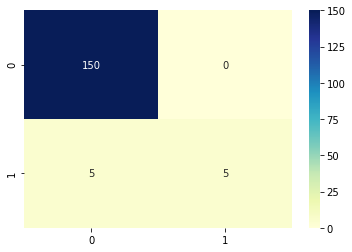

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cfm =confusion_matrix(y,dt_pred)
sns.heatmap(cfm,annot=True, fmt="d",cmap="YlGnBu")

In [8]:
 # Sensitivity = TP/(TP+FN)
sensitivity = 148/(148+8)
sensitivity

0.9487179487179487